# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from keys import openweatherkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print((cities[0]))

nizhneyansk


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#{"coord":{"lon":-133.0374,"lat":69.4541},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":21.2,"feels_like":10.13,"temp_min":21.2,"temp_max":21.2,"pressure":1007,"humidity":79},"visibility":10000,"wind":{"speed":10.36,"deg":70},"clouds":{"all":20},"dt":1619823061,"sys":{"type":1,"id":942,"country":"CA","sunrise":1619782384,"sunset":1619849121},"timezone":-21600,"id":6170031,"name":"Tuktoyaktuk","cod":200}

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + openweatherkey
citydata = []
citycount = len(cities)
for index, city in enumerate(cities):
    cityurl = url + "&q=" + city
    try: 
        print("Processing Record {} of {}".format(index + 1, citycount))
        response = requests.get(cityurl).json()
        citydata.append(response)
    except: 
        print("{} not found".format(city))
print("Done")

Processing Record 1 of 627
Processing Record 2 of 627
Processing Record 3 of 627
Processing Record 4 of 627
Processing Record 5 of 627
Processing Record 6 of 627
Processing Record 7 of 627
Processing Record 8 of 627
Processing Record 9 of 627
Processing Record 10 of 627
Processing Record 11 of 627
Processing Record 12 of 627
Processing Record 13 of 627
Processing Record 14 of 627
Processing Record 15 of 627
Processing Record 16 of 627
Processing Record 17 of 627
Processing Record 18 of 627
Processing Record 19 of 627
Processing Record 20 of 627
Processing Record 21 of 627
Processing Record 22 of 627
Processing Record 23 of 627
Processing Record 24 of 627
Processing Record 25 of 627
Processing Record 26 of 627
Processing Record 27 of 627
Processing Record 28 of 627
Processing Record 29 of 627
Processing Record 30 of 627
Processing Record 31 of 627
Processing Record 32 of 627
Processing Record 33 of 627
Processing Record 34 of 627
Processing Record 35 of 627
Processing Record 36 of 627
P

Processing Record 288 of 627
Processing Record 289 of 627
Processing Record 290 of 627
Processing Record 291 of 627
Processing Record 292 of 627
Processing Record 293 of 627
Processing Record 294 of 627
Processing Record 295 of 627
Processing Record 296 of 627
Processing Record 297 of 627
Processing Record 298 of 627
Processing Record 299 of 627
Processing Record 300 of 627
Processing Record 301 of 627
Processing Record 302 of 627
Processing Record 303 of 627
Processing Record 304 of 627
Processing Record 305 of 627
Processing Record 306 of 627
Processing Record 307 of 627
Processing Record 308 of 627
Processing Record 309 of 627
Processing Record 310 of 627
Processing Record 311 of 627
Processing Record 312 of 627
Processing Record 313 of 627
Processing Record 314 of 627
Processing Record 315 of 627
Processing Record 316 of 627
Processing Record 317 of 627
Processing Record 318 of 627
Processing Record 319 of 627
Processing Record 320 of 627
Processing Record 321 of 627
Processing Rec

Processing Record 571 of 627
Processing Record 572 of 627
Processing Record 573 of 627
Processing Record 574 of 627
Processing Record 575 of 627
Processing Record 576 of 627
Processing Record 577 of 627
Processing Record 578 of 627
Processing Record 579 of 627
Processing Record 580 of 627
Processing Record 581 of 627
Processing Record 582 of 627
Processing Record 583 of 627
Processing Record 584 of 627
Processing Record 585 of 627
Processing Record 586 of 627
Processing Record 587 of 627
Processing Record 588 of 627
Processing Record 589 of 627
Processing Record 590 of 627
Processing Record 591 of 627
Processing Record 592 of 627
Processing Record 593 of 627
Processing Record 594 of 627
Processing Record 595 of 627
Processing Record 596 of 627
Processing Record 597 of 627
Processing Record 598 of 627
Processing Record 599 of 627
Processing Record 600 of 627
Processing Record 601 of 627
Processing Record 602 of 627
Processing Record 603 of 627
Processing Record 604 of 627
Processing Rec

In [5]:
#sample = {'coord': {'lon': 92.0667, 'lat': 49.9811}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 49.64, 'feels_like': 47.59, 'temp_min': 49.64, 'temp_max': 49.64, 'pressure': 1002, 'humidity': 62, 'sea_level': 1002, 'grnd_level': 896}, 'visibility': 10000, 'wind': {'speed': 5.37, 'deg': 319, 'gust': 5.46}, 'clouds': {'all': 56}, 'dt': 1619823805, 'sys': {'country': 'MN', 'sunrise': 1619821698, 'sunset': 1619874552}, 'timezone': 25200, 'id': 1515029, 'name': 'Ulaangom', 'cod': 200}

all_citydata = []
for weathercity in citydata:
    try:
        statuscod = int(weathercity["cod"])
        if statuscod == 200:
            cityname = weathercity["name"]
            print("Processing Record {}".format(cityname))
            lat = weathercity["coord"]["lat"]
            long = weathercity["coord"]["lon"]
            maxtemp = weathercity["main"]["temp_max"]
            humidity = weathercity["main"]["humidity"]
            Cloudiness = weathercity["clouds"]["all"]
            WindSpeed = weathercity["wind"]["speed"]
            Country = weathercity["sys"]["country"]
            citydate = weathercity["dt"]
            dict_items = {"City": cityname, "Lat": lat, "Lng": long, "Max Temp": maxtemp, "Humidity": humidity, "Cloudiness": Cloudiness,
                         "Wind Speed": WindSpeed, "Country": Country, "Date": citydate}
            all_citydata.append(dict_items)
    except: 
        print("{} not found".format(weathercity))
    
#print(sample.keys())

Processing Record Hermanus
Processing Record Hamilton
Processing Record Vaini
Processing Record Yukhnov
Processing Record Ziniaré
Processing Record Kaitangata
Processing Record Mar del Plata
Processing Record Olafsvik
Processing Record Lebu
Processing Record Parabel'
Processing Record Nacala
Processing Record Puerto Ayora
Processing Record Yellowknife
Processing Record Loukhi
Processing Record Punta Arenas
Processing Record Ballitoville
Processing Record Hobart
Processing Record Rikitea
Processing Record Kūhdasht
Processing Record Hilo
Processing Record Bredasdorp
Processing Record Caravelas
Processing Record Hasaki
Processing Record Portalegre
Processing Record Souillac
Processing Record Dingle
Processing Record Tuktoyaktuk
Processing Record Albany
Processing Record Port Alfred
Processing Record Yerbogachën
Processing Record Nanortalik
Processing Record Qaanaaq
Processing Record Solnechnyy
Processing Record Faanui
Processing Record Paamiut
Processing Record Morón
Processing Record Kys

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
all_weather_df = pd.DataFrame(all_citydata)   
all_weather_df.to_csv('CityWeather.csv')
all_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,64.00,68,3,1.01,ZA,1619886496
1,Hamilton,39.1834,-84.5333,61.00,44,1,13.80,US,1619886241
2,Vaini,-21.2000,-175.2000,75.20,83,20,10.36,TO,1619886429
3,Yukhnov,54.7444,35.2297,49.23,63,61,5.55,RU,1619886518
4,Ziniaré,12.5822,-1.2983,102.20,25,0,5.75,BF,1619886518


In [22]:
all_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,21.472849,20.684647,61.946816,68.185886,54.392427,7.948399,1.619887e+09
std,33.726465,89.308671,20.176804,21.966665,38.242703,5.048277,8.314157e+01
min,-54.800000,-179.166700,-5.840000,3.000000,0.000000,0.200000,1.619886e+09
25%,-7.900000,-54.400000,46.990000,54.000000,20.000000,4.230000,1.619887e+09
50%,28.017000,23.433300,66.200000,73.000000,64.000000,6.910000,1.619887e+09
75%,50.316700,101.766700,77.490000,86.000000,90.000000,10.560000,1.619887e+09
max,78.218600,179.316700,107.400000,100.000000,100.000000,34.520000,1.619887e+09


Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#  Get the indices of cities that have humidity over 100%.
all_weather_df['Humidity'] = pd.to_numeric(all_weather_df['Humidity'])
all_weather_df.loc(['Humidity'] > 100)

TypeError: '>' not supported between instances of 'list' and 'int'

In [32]:
all_weather_df = all_weather_df.drop(all_weather_df[all_weather_df.Humidity > 100].index)
all_weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,64.00,68,3,1.01,ZA,1619886496
1,Hamilton,39.1834,-84.5333,61.00,44,1,13.80,US,1619886241
2,Vaini,-21.2000,-175.2000,75.20,83,20,10.36,TO,1619886429
3,Yukhnov,54.7444,35.2297,49.23,63,61,5.55,RU,1619886518
4,Ziniaré,12.5822,-1.2983,102.20,25,0,5.75,BF,1619886518


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

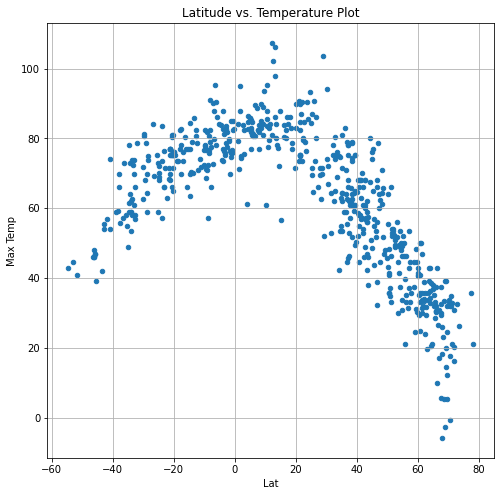

In [34]:
all_weather_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title="Latitude vs. Temperature Plot")
plt.show()


## Latitude vs. Humidity Plot

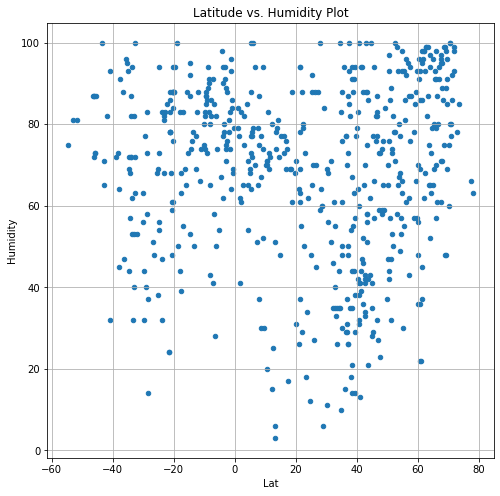

In [35]:
all_weather_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title="Latitude vs. Humidity Plot")
plt.show()

## Latitude vs. Cloudiness Plot

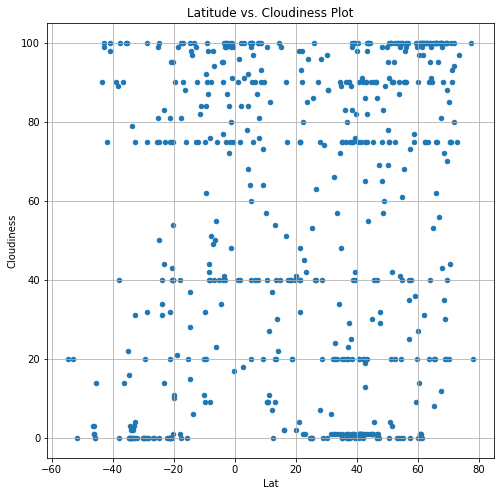

In [36]:
all_weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="Latitude vs. Cloudiness Plot")
plt.show()

## Latitude vs. Wind Speed Plot

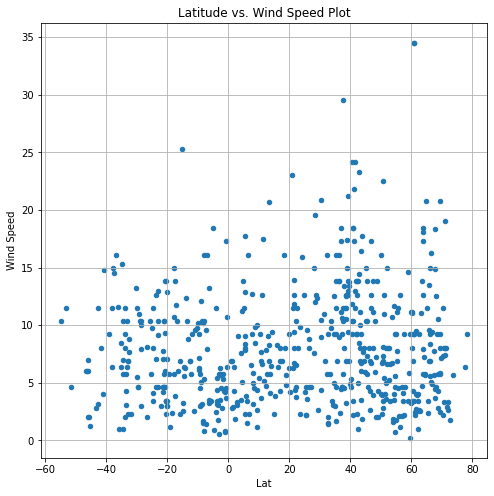

In [38]:
all_weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
              title="Latitude vs. Wind Speed Plot")
plt.show()

## Linear Regression

In [59]:
north_hemi = all_weather_df.loc[(all_weather_df["Lat"] > 0 )]
south_hemi = all_weather_df.loc[(all_weather_df["Lat"] <= 0 )]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

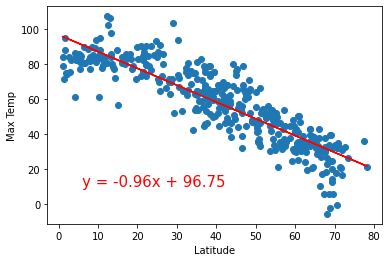

The r-squared is: 0.77065393039793


In [58]:
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

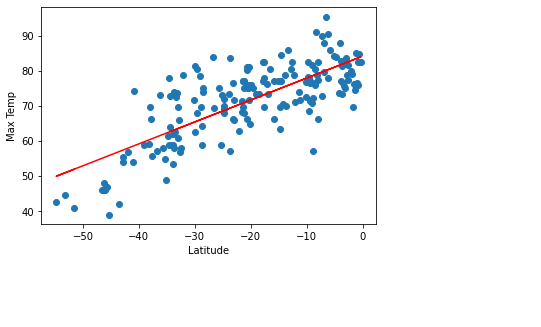

The r-squared is: 0.5811474441920533


In [60]:
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

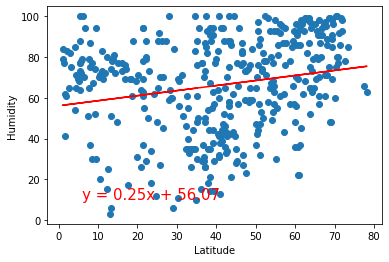

The r-squared is: 0.04494761393493219


In [61]:
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

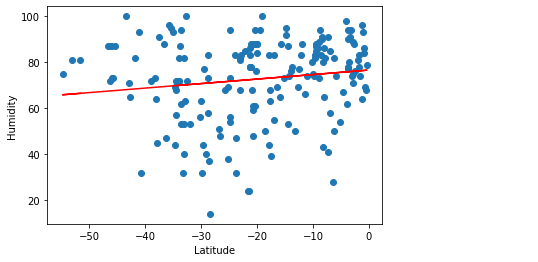

The r-squared is: 0.02155458897702154


In [62]:
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

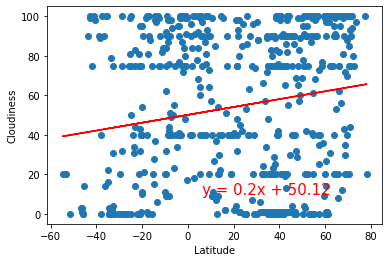

The r-squared is: 0.030721815952682092


In [44]:
x_values = all_weather_df['Lat']
y_values = all_weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

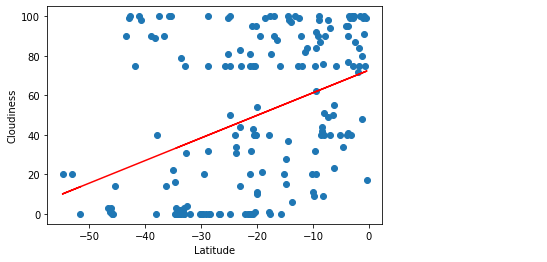

The r-squared is: 0.1559663675558563


In [63]:
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

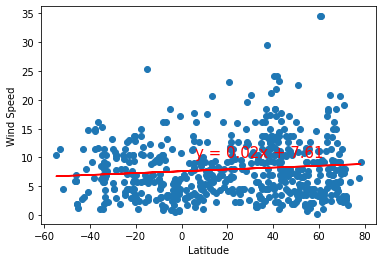

The r-squared is: 0.011257497917361204


In [46]:
x_values = all_weather_df['Lat']
y_values = all_weather_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

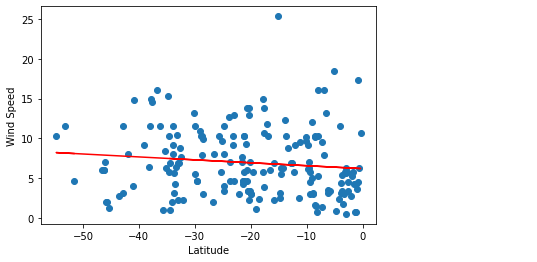

The r-squared is: 0.013518553144591338


In [64]:
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-squared is: {rvalue**2}")